In [2]:
#1. Leer y visualizar el video carretera.mp4
import cv2
import numpy as np 
import matplotlib.pyplot as plt
video = cv2.VideoCapture('trafico01.mp4')
frames = []

while True:
    ret, frame = video.read()
    if not ret:
        break
    frames.append(frame)
    cv2.imshow('Vídeo carretera', frame)
    cv2.waitKey(25)
video.release()
cv2.destroyAllWindows()

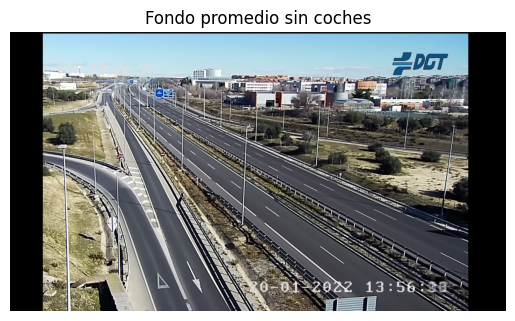

In [3]:
frames_np = np.array(frames, dtype=np.float32)

fondo_promedio = np.mean(frames_np, axis=0)

fondo_promedio_uint8 = fondo_promedio.astype(np.uint8)

plt.imshow(cv2.cvtColor(fondo_promedio_uint8, cv2.COLOR_BGR2RGB))
plt.title("Fondo promedio sin coches")
plt.axis('off')
plt.show()

In [4]:
# Restar el fondo y binarizar
T = 27

for i, frame in enumerate(frames):

    diferencia = cv2.absdiff(frame, fondo_promedio_uint8)
    
    gris = cv2.cvtColor(diferencia, cv2.COLOR_BGR2GRAY)
    
    _, binario = cv2.threshold(gris, T, 255, cv2.THRESH_BINARY)
    
    cv2.imshow('Binarizado', binario)
    
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()

In [8]:
T = 27

for frame in frames:

    diferencia = cv2.absdiff(frame, fondo_promedio_uint8)
    
    gris = cv2.cvtColor(diferencia, cv2.COLOR_BGR2GRAY)
    
    _, binario = cv2.threshold(gris, T, 255, cv2.THRESH_BINARY)
    
    contornos, _ = cv2.findContours(binario, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    img = frame.copy()
    
    for contorno in contornos:
        if cv2.contourArea(contorno) > 1500:  
            x, y, w, h = cv2.boundingRect(contorno)
            cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
    
    
    cv2.imshow('Deteccion de coches', img)
    
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()

In [ ]:
print("hola mundo")